
[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


  ECG_Rate_Mean    HRV_MeanNN               HRV_SDNN HRV_SDANN1 HRV_SDNNI1  \
0     49.571385  [[1409.875]]  [[672.7675987556802]]    [[nan]]    [[nan]]   

  HRV_SDANN2 HRV_SDNNI2 HRV_SDANN5 HRV_SDNNI5               HRV_RMSSD  ...  \
0    [[nan]]    [[nan]]    [[nan]]    [[nan]]  [[1139.5969859220322]]  ...   

               HRV_SampEn             HRV_ShanEn            HRV_FuzzyEn  \
0  [[1.2039728043259361]]  [[4.937499999999999]]  [[1.473605016756425]]   

  HRV_MSEn HRV_CMSEn HRV_RCMSEn                  HRV_CD  \
0  [[0.0]]   [[0.0]]    [[0.0]]  [[1.5076764067898036]]   

                 HRV_HFD                HRV_KFD     HRV_LZC  
0  [[2.048236985864973]]  [[4.639125489380365]]  [[1.5625]]  

[1 rows x 83 columns]


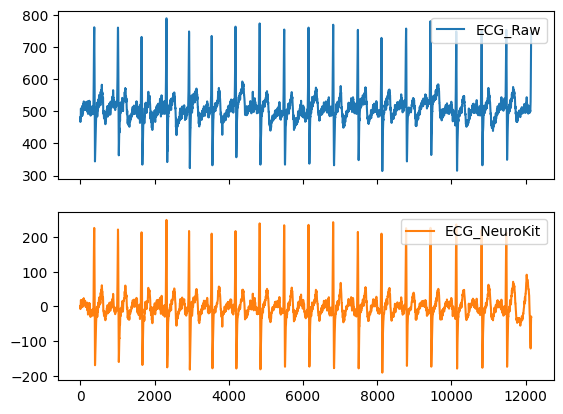

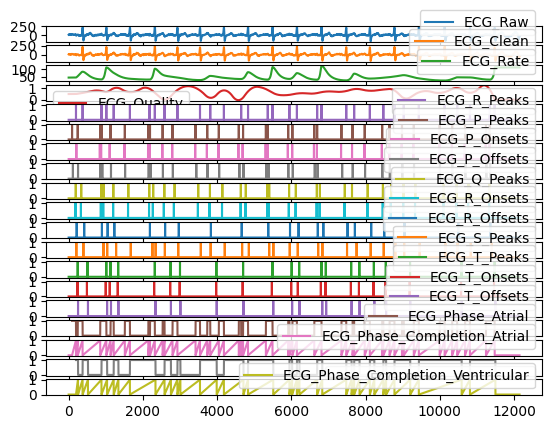

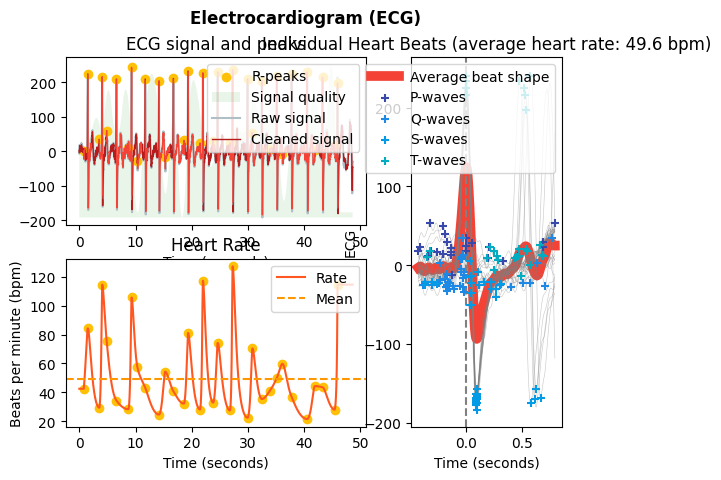

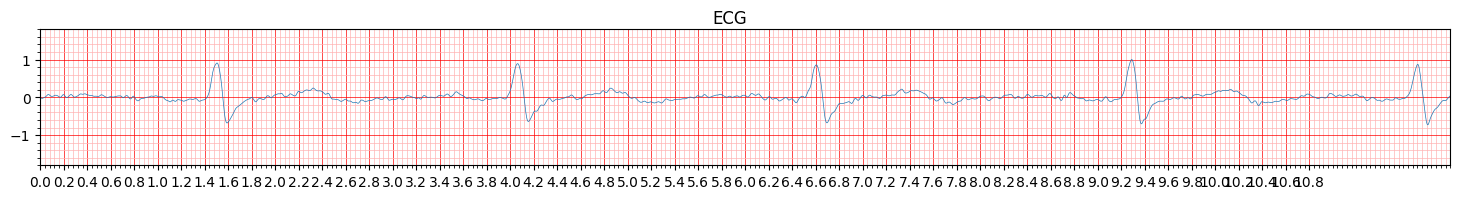

In [ ]:
!pip install neurokit2 seaborn
!pip install neurokit2 ecg-plot

import neurokit2 as nk

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import ecg_plot

#ecg = nk.ecg_simulate(duration=10, sampling_rate=250, noise=0.2)

#ecg += np.random.normal(0, 0.1, len(ecg))

ecg= np.loadtxt(r'C:\Users\Usuario\Desktop\Repositorio\ISB-Grupo-5\Otros\Archivos_varios\Lab5_ECG\reposoD1.txt', comments='#',skiprows=4, usecols=5)
filtered= nk.ecg_clean(ecg, sampling_rate=250, method="neurokit")

signals = pd.DataFrame({
    "ECG_Raw" : ecg,
    "ECG_NeuroKit" : nk.ecg_clean(ecg, sampling_rate=250, method="neurokit"),
    #"ECG_BioSPPy" : nk.ecg_clean(ecg, sampling_rate=250, method="biosppy"),
    #"ECG_PanTompkins" : nk.ecg_clean(ecg, sampling_rate=250, method="pantompkins1985"),
    #"ECG_Hamilton" : nk.ecg_clean(ecg, sampling_rate=250, method="hamilton2002"),
    #"ECG_Elgendi" : nk.ecg_clean(ecg, sampling_rate=250, method="elgendi2010"),
    #"ECG_EngZeeMod" : nk.ecg_clean(ecg, sampling_rate=250, method="engzeemod2012"),
    #"ECG_VG" : nk.ecg_clean(ecg, sampling_rate=250, method="vg"),
    #"ECG_TC" : nk.ecg_clean(ecg, sampling_rate=250, method="templateconvolution")
})

signals.plot(subplots=True)

signals, info = nk.ecg_process(filtered, sampling_rate=250)
signals.plot(subplots=True)

analysis = nk.ecg_analyze(signals, sampling_rate=250)
print(analysis)

nk.ecg_plot(signals,info)
normalized_filtered = filtered / np.max(np.abs(filtered))
ecg_plot.plot_1(normalized_filtered[:3000],sample_rate=250)
plt.show()
